In [1]:
%matplotlib inline

In [108]:
import os
from glob import glob
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data_dir = os.path.join('..', 'data')
lis_output_dir = os.path.join(data_dir, 'target_SMAPDA_OUTPUT', 'SURFACEMODEL')

In [4]:
lis_output_paths = sorted(glob(os.path.join(lis_output_dir, '*', 'LIS_HIST*.nc')))
lis_restart_paths = sorted(glob(os.path.join(lis_output_dir, '*', 'LIS_RST*.nc')))

In [5]:
lis_output_paths

['../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701010600.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701011200.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701011800.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701020000.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701020600.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701021200.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701021800.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701030000.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701030600.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701031200.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701031800.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_HIST_201701040000.d01.nc',
 '../data/target

In [6]:
lis_restart_paths

['../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201701/LIS_RST_NOAH36_201701312345.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201702/LIS_RST_NOAH36_201702282345.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201703/LIS_RST_NOAH36_201703312345.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201704/LIS_RST_NOAH36_201704302345.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201705/LIS_RST_NOAH36_201705312345.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201706/LIS_RST_NOAH36_201706302345.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201707/LIS_RST_NOAH36_201707312345.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201708/LIS_RST_NOAH36_201708312345.d01.nc',
 '../data/target_SMAPDA_OUTPUT/SURFACEMODEL/201709/LIS_RST_NOAH36_201709010000.d01.nc']

In [7]:
len(lis_output_paths) / 4

243.0

In [86]:
lis_output_data = xr.open_mfdataset(lis_output_paths, chunks={"time":10}, parallel=True)

In [87]:
lis_output_data

<xarray.Dataset>
Dimensions:         (SoilMoist_profiles: 4, SoilTemp_profiles: 4, east_west: 28, north_south: 22, time: 972)
Coordinates:
  * time            (time) datetime64[ns] 2017-01-01T06:00:00 ... 2017-09-01
Dimensions without coordinates: SoilMoist_profiles, SoilTemp_profiles, east_west, north_south
Data variables:
    lat             (time, north_south, east_west) float32 dask.array<concate...
    lon             (time, north_south, east_west) float32 dask.array<concate...
    Swnet_tavg      (time, north_south, east_west) float32 dask.array<concate...
    Lwnet_tavg      (time, north_south, east_west) float32 dask.array<concate...
    Qle_tavg        (time, north_south, east_west) float32 dask.array<concate...
    Qh_tavg         (time, north_south, east_west) float32 dask.array<concate...
    Qg_tavg         (time, north_south, east_west) float32 dask.array<concate...
    Snowf_tavg      (time, north_south, east_west) float32 dask.array<concate...
    Rainf_tavg      (time, north_south, east_west) float32 dask.array<concate...
    Evap_tavg       (time, north_south, east_west) float32 dask.array<concate...
    Qs_tavg         (time, north_south, east_west) float32 dask.array<concate...
    Qsb_tavg        (time, north_south, east_west) float32 dask.array<concate...
    Albedo_tavg     (time, north_south, east_west) float32 dask.array<concate...
    SWE_tavg        (time, north_south, east_west) float32 dask.array<concate...
    SnowDepth_tavg  (time, north_south, east_west) float32 dask.array<concate...
    SoilMoist_tavg  (time, SoilMoist_profiles, north_south, east_west) float32 dask.array<concatenate, shape=(972, 4, 22, 28), dtype=float32, chunksize=(1, 4, 22, 28), chunktype=numpy.ndarra...
    SoilTemp_tavg   (time, SoilTemp_profiles, north_south, east_west) float32 dask.array<concatenate, shape=(972, 4, 22, 28), dtype=float32, chunksize=(1, 4, 22, 28), chunktype=numpy.ndarray...
    Rainf_f_tavg    (time, north_south, east_west) float32 dask.array<concate...
    Tair_f_tavg     (time, north_south, east_west) float32 dask.array<concate...
    SWdown_f_tavg   (time, north_south, east_west) float32 dask.array<concate...
    LWdown_f_tavg   (time, north_south, east_west) float32 dask.array<concate...
Attributes:
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [ 10.        30.000002  60.000004 100.      ]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  Noah.3.6+template open water
    history:                 created on date: 2019-05-08T21:17:11.991
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    conventions:             CF-1.6
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   34.375
    SOUTH_WEST_CORNER_LON:   -102.875
    DX:                      0.25
    DY:                      0.25

In [88]:
init_time = time=lis_output_data.time.values[0]
lons = lis_output_data.sel(time=init_time).lon.values[0,:]
lats = lis_output_data.sel(time=init_time).lat.values[:,0]

coords = {
    'lat': lats,
    'lon': lons
}

lis_output_data = lis_output_data.drop(['lon', 'lat'])
lis_output_data = lis_output_data.rename({'north_south':'lat', 'east_west':'lon'})
lis_output_data = lis_output_data.assign_coords(coords)

In [89]:
lis_output_data

<xarray.Dataset>
Dimensions:         (SoilMoist_profiles: 4, SoilTemp_profiles: 4, lat: 22, lon: 28, time: 972)
Coordinates:
  * time            (time) datetime64[ns] 2017-01-01T06:00:00 ... 2017-09-01
  * lat             (lat) float32 34.375004 34.624996 34.875 ... 39.375 39.625
  * lon             (lon) float32 -102.87499 -102.62502 ... -96.375 -96.12499
Dimensions without coordinates: SoilMoist_profiles, SoilTemp_profiles
Data variables:
    Swnet_tavg      (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Lwnet_tavg      (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qle_tavg        (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qh_tavg         (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qg_tavg         (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Snowf_tavg      (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Rainf_tavg      (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Evap_tavg       (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qs_tavg         (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qsb_tavg        (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Albedo_tavg     (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    SWE_tavg        (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    SnowDepth_tavg  (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    SoilMoist_tavg  (time, SoilMoist_profiles, lat, lon) float32 dask.array<c...
    SoilTemp_tavg   (time, SoilTemp_profiles, lat, lon) float32 dask.array<co...
    Rainf_f_tavg    (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Tair_f_tavg     (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    SWdown_f_tavg   (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    LWdown_f_tavg   (time, lat, lon) float32 dask.array<concatenate, shape=(9...
Attributes:
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [ 10.        30.000002  60.000004 100.      ]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  Noah.3.6+template open water
    history:                 created on date: 2019-05-08T21:17:11.991
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    conventions:             CF-1.6
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   34.375
    SOUTH_WEST_CORNER_LON:   -102.875
    DX:                      0.25
    DY:                      0.25

In [101]:
monthly_mean = lis_output_data.resample(time='1m').mean(dim='time', keep_attrs=True)

In [102]:
monthly_mean

<xarray.Dataset>
Dimensions:         (SoilMoist_profiles: 4, SoilTemp_profiles: 4, lat: 22, lon: 28, time: 9)
Coordinates:
  * time            (time) datetime64[ns] 2017-01-31 2017-02-28 ... 2017-09-30
  * lat             (lat) float32 34.375004 34.624996 34.875 ... 39.375 39.625
  * lon             (lon) float32 -102.87499 -102.62502 ... -96.375 -96.12499
Dimensions without coordinates: SoilMoist_profiles, SoilTemp_profiles
Data variables:
    Swnet_tavg      (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Lwnet_tavg      (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qle_tavg        (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qh_tavg         (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qg_tavg         (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Snowf_tavg      (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Rainf_tavg      (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Evap_tavg       (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qs_tavg         (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Qsb_tavg        (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Albedo_tavg     (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    SWE_tavg        (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    SnowDepth_tavg  (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    SoilMoist_tavg  (time, SoilMoist_profiles, lat, lon) float32 dask.array<c...
    SoilTemp_tavg   (time, SoilTemp_profiles, lat, lon) float32 dask.array<co...
    Rainf_f_tavg    (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    Tair_f_tavg     (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    SWdown_f_tavg   (time, lat, lon) float32 dask.array<concatenate, shape=(9...
    LWdown_f_tavg   (time, lat, lon) float32 dask.array<concatenate, shape=(9...
Attributes:
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [ 10.        30.000002  60.000004 100.      ]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  Noah.3.6+template open water
    history:                 created on date: 2019-05-08T21:17:11.991
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    conventions:             CF-1.6
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   34.375
    SOUTH_WEST_CORNER_LON:   -102.875
    DX:                      0.25
    DY:                      0.25

In [115]:
monthly_date = []

for date in monthly_mean.time.values:
    monthly_date.append(pd.to_datetime(date).strftime('%Y-%m'))

In [116]:
monthly_date

['2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09']

In [121]:
monthly_mean = monthly_mean.assign_coords({'time':monthly_date})

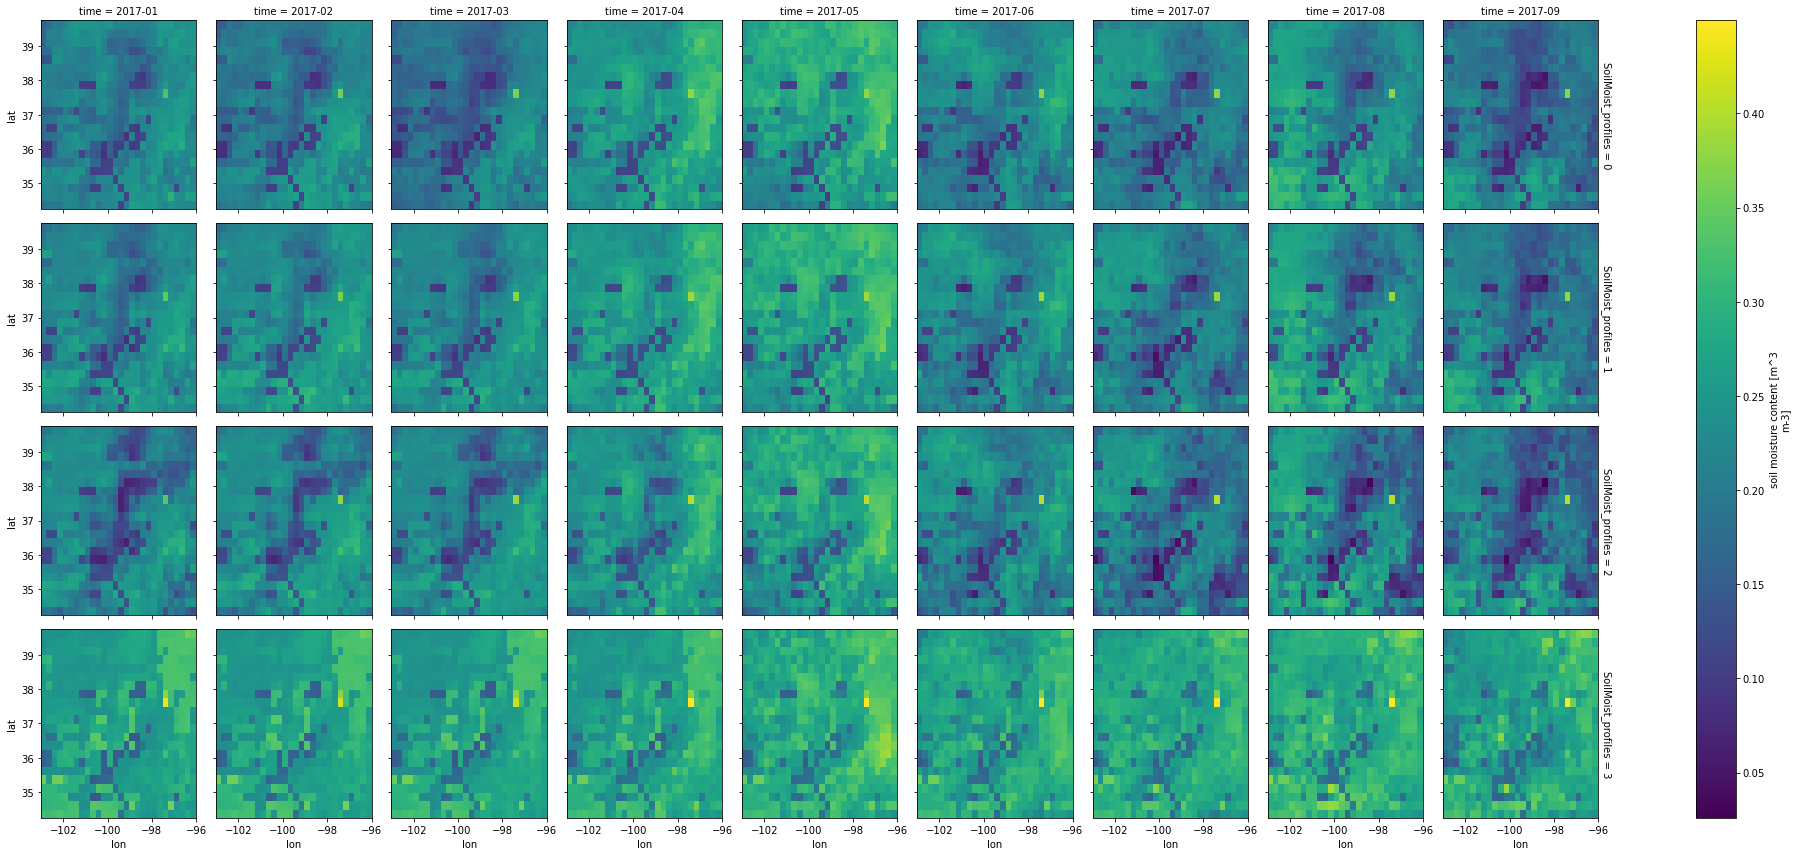

In [122]:
monthly_mean.SoilMoist_tavg.plot(x='lon', y='lat', col='time', row='SoilMoist_profiles')

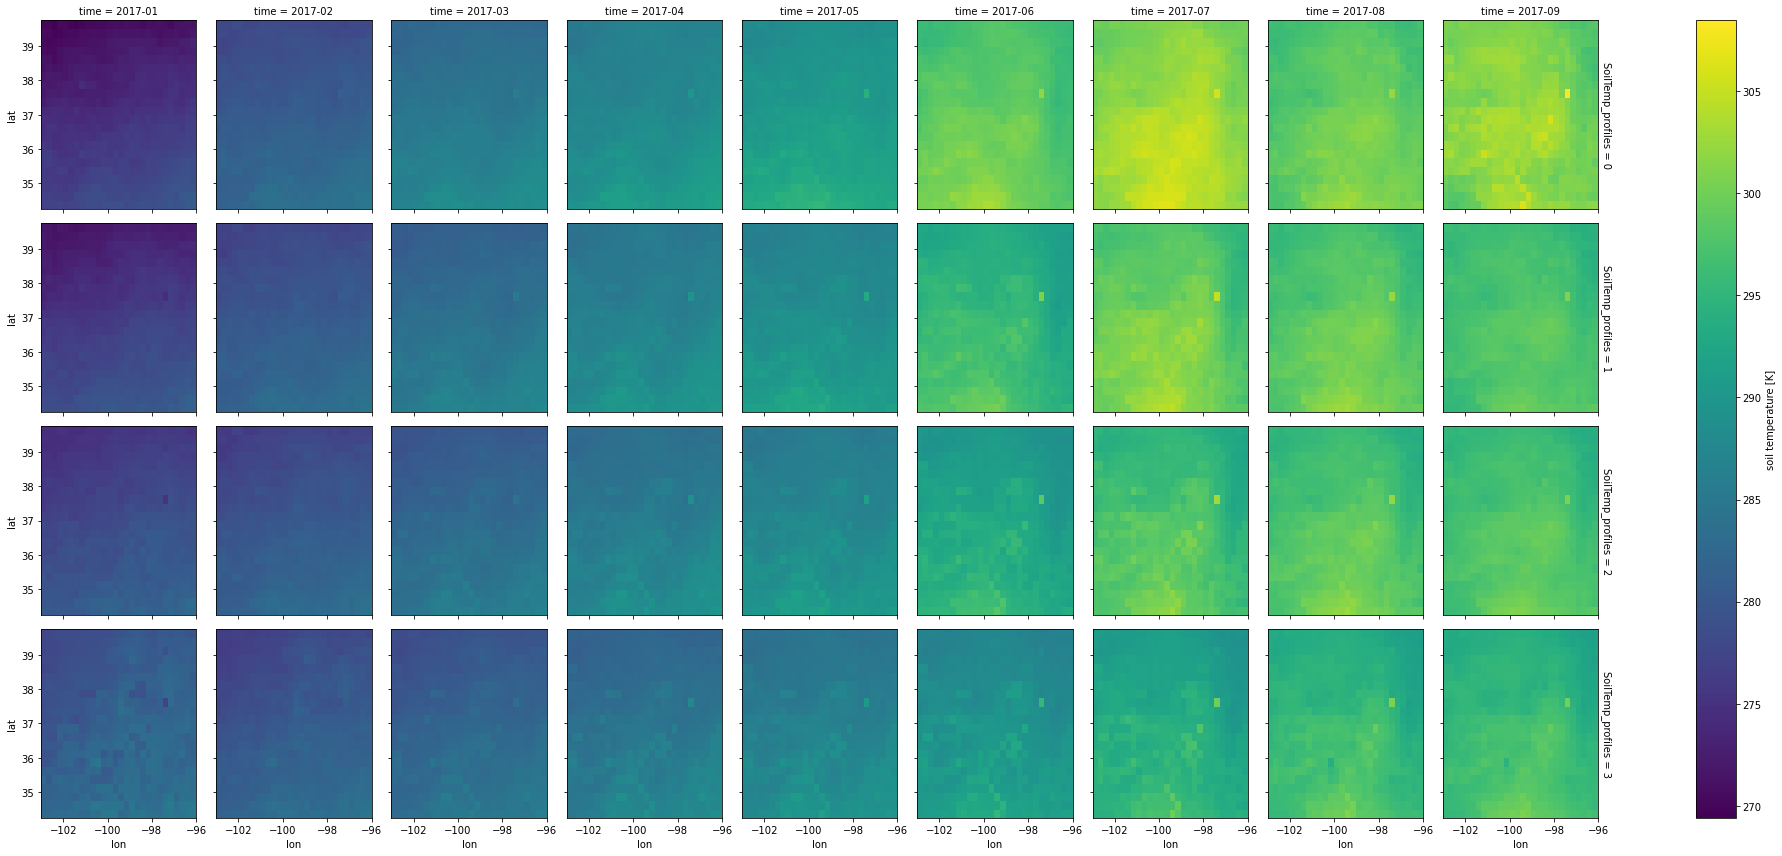

In [123]:
monthly_mean.SoilTemp_tavg.plot(x='lon', y='lat', col='time', row='SoilTemp_profiles')

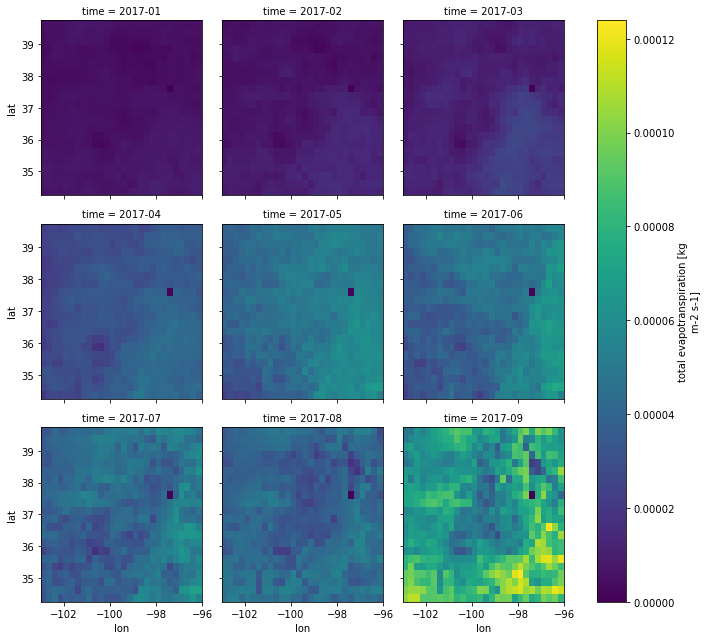

In [125]:
monthly_mean.Evap_tavg.plot(x='lon', y='lat', col='time', col_wrap=3)

In [ ]:
monthly_evap_mean = monthly_mean.Evap_tavg.mean(dim=['lon', 'lat'])

In [ ]:
monthly_evap_mean.plot()

In [ ]:
soil_moist_data = lis_output_data.SoilMoist_tavg
sm_daily_mean = soil_moist_data.groupby('time.dayofyear').mean(dim=['lon', 'lat'])

In [ ]:
rain_flux = lis_output_data.Rainf_f_tavg
rain_f_daily_mean = rain_flux.groupby('time.dayofyear').mean(dim=['lon', 'lat'])

In [ ]:
print(soil_moist_data.units)
print(rain_flux.units)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sm_daily_mean.plot(hue='SoilMoist_profiles', ax=ax)
ax.set_ylabel(r'Mean Daily Soil Moisture ($\mathregular{\frac{m^3}{m^3}}$)')
ax.set_xlabel('Date')
ax.set_title('Mean Daily Soil Moisture and Rain Flux')
sm_handles, sm_labels = ax.get_legend_handles_labels()
print(sm_handles, sm_labels)
ax.legend(loc=2, title='Soil Moisture Layer', handles=sm_handles, labels=sm_labels)

ax2 = ax.twinx()
rain_f_daily_mean.plot(ax=ax2, color='purple', label='Rain Flux')
ax2.set_ylabel(r'Mean Daily Rain Flux ($\mathregular{\frac{\frac{kg}{m^2}}{s}}$)')
ax2.legend(loc=1)

sm_lines, sm_labels = ax.get_legend_handles_labels()
rf_lines, rf_labels = ax2.get_legend_handles_labels()

#fig.legend()#handles=sm_lines+rf_lines, labels=sm_labels+rf_labels)

#ax2.legend(title='Rain Flux')
#plt.legend(frameon=False)



# ax2.legend(sm_lines + rf_lines, sm_labels + rf_labels, loc=0)


In [44]:
soil_moist_data.units

'm^3 m-3'

In [48]:
fr'${soil_moist_data.units}$'

'$m^3 m-3$'